# KOSPI와 연관된 지수는?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

import koreanize_matplotlib

from sklearn.cluster import DBSCAN
from sklearn.cluster import KMeans

import FinanceDataReader as fdr
import cvxopt as opt
from cvxopt import solvers

## 세계 각국의 지수들 관련 데이터 불러오기

### KOSPI
* change(수익률)에 * 100을 해서 %수치로 보이기 편하게 수정하였고, Open(시가), High(고가), Close(종가), Volume(거래량)을 제거

In [2]:
kospi = fdr.DataReader('KS11')
kospi['Change'] = kospi['Change'] * 100
kospi = kospi.drop(['Open', 'High', 'Low', 'Close', 'Volume', 'UpDown', 'Comp', 'Amount', 'MarCap'], axis = 1)
kospi.rename(columns = {'Change':'KOSPI'},inplace=True)
kospi.head()

,KOSPI
Date,
2001-06-11,-2.18
2001-06-12,-0.18
2001-06-13,1.14
2001-06-14,-0.05
2001-06-15,0.85


### Nasdaq

In [3]:
nasdaq = fdr.DataReader('IXIC', '2001-06-08')
nasdaq['Change'] = round(nasdaq['Adj Close'].pct_change() *100, 2)
nasdaq = nasdaq.drop(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], axis = 1)
nasdaq = nasdaq.drop('2001-06-08', axis = 0)
nasdaq.rename(columns = {'Change':'NASDAQ'},inplace=True)
nasdaq

,NASDAQ
Date,
2001-06-11,-2.00
2001-06-12,-0.04
2001-06-13,-2.23
2001-06-14,-3.66
2001-06-15,-0.77
...,...
2024-01-17,-0.59
2024-01-18,1.35
2024-01-19,1.70


### S&P 

In [4]:
sap = fdr.DataReader('S&P500', '2001-06-08', '2024-01-23')
sap['Change'] = round(sap['Adj Close'].pct_change() * 100, 2)
sap = sap.drop(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], axis = 1)
sap = sap.drop('2001-06-08', axis = 0)
sap.rename(columns = {'Change':'S&P'},inplace=True)
sap.head()

,S&P
Date,
2001-06-11,-0.84
2001-06-12,0.12
2001-06-13,-1.13
2001-06-14,-1.75
2001-06-15,-0.45


### 미국 10년 국채

In [5]:
usa_treasury = fdr.DataReader('US10YT', '2001-06-08', '2024-01-23')
usa_treasury['Change'] = round(usa_treasury['Adj Close'].pct_change() * 100, 2)
usa_treasury = usa_treasury.drop(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], axis = 1)
usa_treasury = usa_treasury.drop('2001-06-08', axis = 0)
usa_treasury = usa_treasury.rename(columns = {'Change':'USA_TREASURY'})
usa_treasury

C:\Users\sigma\AppData\Local\Temp\ipykernel_19212\2197024751.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  usa_treasury['Change'] = round(usa_treasury['Adj Close'].pct_change() * 100, 2)


,USA_TREASURY
Date,
2001-06-10,0.00
2001-06-11,-0.86
2001-06-12,-0.89
2001-06-13,0.32
2001-06-14,-0.80
...,...
2024-01-17,0.98
2024-01-18,0.93
2024-01-19,0.05


### Nikkei

In [6]:
japan = fdr.DataReader('N225', '2001-06-08', '2024-01-23')
japan['Change'] = round(japan['Adj Close'].pct_change() * 100, 2)
japan = japan.drop(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], axis = 1)
japan = japan.drop('2001-06-08', axis = 0)
japan.rename(columns = {'Change':'Nikkei'},inplace=True)
japan

C:\Users\sigma\AppData\Local\Temp\ipykernel_19212\3872993107.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  japan['Change'] = round(japan['Adj Close'].pct_change() * 100, 2)


,Nikkei
Date,
2001-06-11,-1.52
2001-06-12,-2.92
2001-06-13,-0.13
2001-06-14,0.18
2001-06-15,-0.44
...,...
2024-01-16,-0.79
2024-01-17,-0.40
2024-01-18,-0.03


In [7]:
usd_krw = fdr.DataReader('USD/KRW', '2001-06-08')
usd_krw['Change'] = round(usd_krw['Adj Close'].pct_change() * 100, 2)
usd_krw = usd_krw.drop(['High', 'Low', 'Open', 'Close', 'Volume', 'Adj Close'], axis = 1)
usd_krw = usd_krw.rename(columns = {'Change':'USD/KRW'})
usd_krw

C:\Users\sigma\AppData\Local\Temp\ipykernel_19212\4191296131.py:2: FutureWarning: The default fill_method='pad' in Series.pct_change is deprecated and will be removed in a future version. Either fill in any non-leading NA values prior to calling pct_change or specify 'fill_method=None' to not fill NA values.
  usd_krw['Change'] = round(usd_krw['Adj Close'].pct_change() * 100, 2)


,USD/KRW
Date,
2003-12-01,NaN
2003-12-02,-0.28
2003-12-03,-0.21
2003-12-04,-0.20
2003-12-05,-0.45
...,...
2024-01-18,0.47
2024-01-19,-0.48
2024-01-22,-0.33


## 데이터 병합
각 지수들 및 환율 국채를 합쳐줍니다. 결측치는 평균으로 대체하였습니다.

In [8]:
result_data = pd.concat([kospi, nasdaq, sap, usd_krw, usa_treasury, japan], axis = 1)
result_data.fillna(result_data.mean(), inplace = True)
result_data = round(result_data, 2)

,KOSPI,NASDAQ,S&P,USD/KRW,USA_TREASURY,Nikkei
Date,,,,,,
2001-06-11,-2.18,-2.00,-0.84,0.01,-0.86,-1.52
2001-06-12,-0.18,-0.04,0.12,0.01,-0.89,-2.92
2001-06-13,1.14,-2.23,-1.13,0.01,0.32,-0.13
2001-06-14,-0.05,-3.66,-1.75,0.01,-0.80,0.18
2001-06-15,0.85,-0.77,-0.45,0.01,0.25,-0.44
...,...,...,...,...,...,...
2023-12-24,0.03,0.04,0.03,0.01,0.00,0.03
2023-12-31,0.03,0.04,0.03,0.01,0.00,0.03
2024-01-07,0.03,0.04,0.03,0.01,0.00,0.03


In [28]:
result_data.to_csv('./data/kospi_result_data.csv')

## 군집분석

## K_Means 를 사용하여 군집을 분류하였습니다.
- kospi 를 target으로 설정하였습니다

In [9]:
X = result_data[["NASDAQ","S&P","USD/KRW","USA_TREASURY","Nikkei"]]
y = result_data["KOSPI"]

### $N$ = $\{3,4\}$일때 최적의 분류를 확인

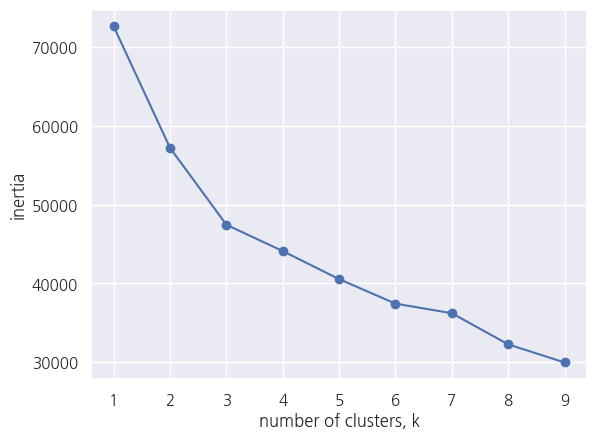

In [10]:
ks = range(1,10)

inertias = []

for k in ks:
    model = KMeans(n_clusters=k,random_state=42)
    model.fit(X)
    inertias.append(model.inertia_)

plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show() 

### $N$ = $3$로 군집분석 진행 

In [11]:
n_clusters = 3
kmeans = KMeans(n_clusters=n_clusters,random_state=42)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans[1:10]

array([2, 2, 1, 2, 2, 2, 2, 2, 1])

### TSNE를 통한 차원축소 진행

In [12]:
import time
from sklearn.manifold import TSNE

n_sne = X.shape[0]

time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=32, n_iter=1000,random_state=0,angle=0.5)
tsne_results = tsne.fit_transform(X)
print( 't-SNE done! Time elapsed: {} seconds'.format(time.time() - time_start ))

[t-SNE] Computing 97 nearest neighbors...
[t-SNE] Indexed 7084 samples in 0.004s...
[t-SNE] Computed neighbors for 7084 samples in 0.174s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7084
[t-SNE] Computed conditional probabilities for sample 2000 / 7084
[t-SNE] Computed conditional probabilities for sample 3000 / 7084
[t-SNE] Computed conditional probabilities for sample 4000 / 7084
[t-SNE] Computed conditional probabilities for sample 5000 / 7084
[t-SNE] Computed conditional probabilities for sample 6000 / 7084
[t-SNE] Computed conditional probabilities for sample 7000 / 7084
[t-SNE] Computed conditional probabilities for sample 7084 / 7084
[t-SNE] Mean sigma: 0.000000
[t-SNE] KL divergence after 250 iterations with early exaggeration: 77.894424
[t-SNE] KL divergence after 1000 iterations: 1.677709
t-SNE done! Time elapsed: 11.359419584274292 seconds


### 군집분석 결과 시각화

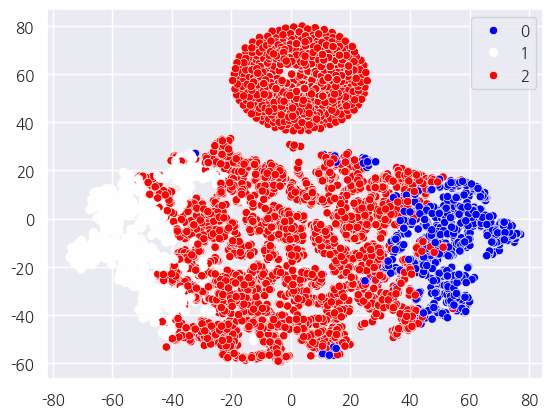

In [13]:
plt.scatter(tsne_results[:,0], tsne_results[:,1], c=y_kmeans, s=20, cmap='bwr')
sns.scatterplot(x=tsne_results[:,0], y=tsne_results[:,1], hue=y_kmeans, palette='bwr')
plt.show()

In [14]:
df1 = result_data.copy()

In [15]:
df1['cluster'] = y_kmeans
df1

,KOSPI,NASDAQ,S&P,USD/KRW,USA_TREASURY,Nikkei,cluster
Date,,,,,,,
2001-06-11,-2.18,-2.00,-0.84,0.01,-0.86,-1.52,1
2001-06-12,-0.18,-0.04,0.12,0.01,-0.89,-2.92,2
2001-06-13,1.14,-2.23,-1.13,0.01,0.32,-0.13,2
2001-06-14,-0.05,-3.66,-1.75,0.01,-0.80,0.18,1
2001-06-15,0.85,-0.77,-0.45,0.01,0.25,-0.44,2
...,...,...,...,...,...,...,...
2023-12-24,0.03,0.04,0.03,0.01,0.00,0.03,2
2023-12-31,0.03,0.04,0.03,0.01,0.00,0.03,2
2024-01-07,0.03,0.04,0.03,0.01,0.00,0.03,2


### 군집분석 결과에 따른 군집들을 새로운 데이터 프레임으로 생성 

In [16]:
## 군집 0 ~ 3 까지 분류된거를 변수명에 추가
cluster_2 = df1[df1['cluster']==2]
cluster_1 = df1[df1['cluster']==1]
cluster_0 = df1[df1['cluster']==0]

In [17]:
cluster_0

,KOSPI,NASDAQ,S&P,USD/KRW,USA_TREASURY,Nikkei,cluster
Date,,,,,,,
2001-06-26,-1.56,0.67,-0.15,0.01,1.79,0.64,0
2001-06-28,-0.25,2.44,1.25,0.01,1.78,-1.16,0
2001-09-04,3.13,-1.92,-0.06,0.01,3.38,3.49,0
2001-10-11,2.70,4.62,1.52,0.01,1.63,3.83,0
2001-11-02,1.19,-0.03,0.29,0.01,3.06,0.35,0
...,...,...,...,...,...,...,...
2022-06-06,0.03,0.40,0.31,0.78,2.74,0.56,0
2023-05-01,0.03,-0.11,-0.04,-0.17,3.53,0.92,0
2023-05-05,0.03,2.25,1.85,-1.13,2.83,0.03,0


In [18]:
cluster_1

,KOSPI,NASDAQ,S&P,USD/KRW,USA_TREASURY,Nikkei,cluster
Date,,,,,,,
2001-06-11,-2.18,-2.00,-0.84,0.01,-0.86,-1.52,1
2001-06-14,-0.05,-3.66,-1.75,0.01,-0.80,0.18,1
2001-06-22,0.60,-1.16,-0.95,0.01,-1.04,0.63,1
2001-07-06,-2.54,-3.65,-2.35,0.01,-0.70,-2.39,1
2001-07-10,-0.25,-3.15,-1.44,0.01,-1.27,0.50,1
...,...,...,...,...,...,...,...
2020-08-17,0.03,1.00,0.27,0.16,-3.67,-0.83,1
2021-08-16,0.03,-0.20,0.26,-0.06,-3.08,-1.62,1
2021-09-20,0.03,-2.19,-1.70,0.57,-4.45,0.03,1


In [19]:
cluster_2

,KOSPI,NASDAQ,S&P,USD/KRW,USA_TREASURY,Nikkei,cluster
Date,,,,,,,
2001-06-12,-0.18,-0.04,0.12,0.01,-0.89,-2.92,2
2001-06-13,1.14,-2.23,-1.13,0.01,0.32,-0.13,2
2001-06-15,0.85,-0.77,-0.45,0.01,0.25,-0.44,2
2001-06-18,-1.64,-1.96,-0.49,0.01,0.25,-0.72,2
2001-06-19,0.02,0.20,0.34,0.01,-0.25,-0.97,2
...,...,...,...,...,...,...,...
2023-12-24,0.03,0.04,0.03,0.01,0.00,0.03,2
2023-12-31,0.03,0.04,0.03,0.01,0.00,0.03,2
2024-01-07,0.03,0.04,0.03,0.01,0.00,0.03,2


### 군집별 수익률 확인
- 군집 0 ~ 3 까지의 수익률을 한번 확인

In [20]:
cluster_total= df1.groupby('cluster').mean()
cluster_total['return'] = cluster_total.T.mean()
cluster_total['std'] = cluster_total.T.std()
cluster_total = cluster_total.T
cluster_total

cluster,0,1,2
KOSPI,0.305276,-0.370711,0.074639
NASDAQ,0.798905,-1.309001,0.215742
S&P,0.709920,-1.130449,0.172653
USD/KRW,-0.014442,0.094522,-0.009719
USA_TREASURY,3.434774,-2.606080,-0.036925
Nikkei,0.363940,-0.446105,0.074531
return,0.933062,-0.961304,0.081820
std,1.150517,0.874051,0.090157


- 군집1 : 위험자산 + USA_TREASURY로 이뤄진 군집  
- 군집2 : Dolllar로 이뤄진 군집  
- 군집3 : 위험자산으로 이뤄진 군집 

### 군집별 수익률 대비 risk 시각화

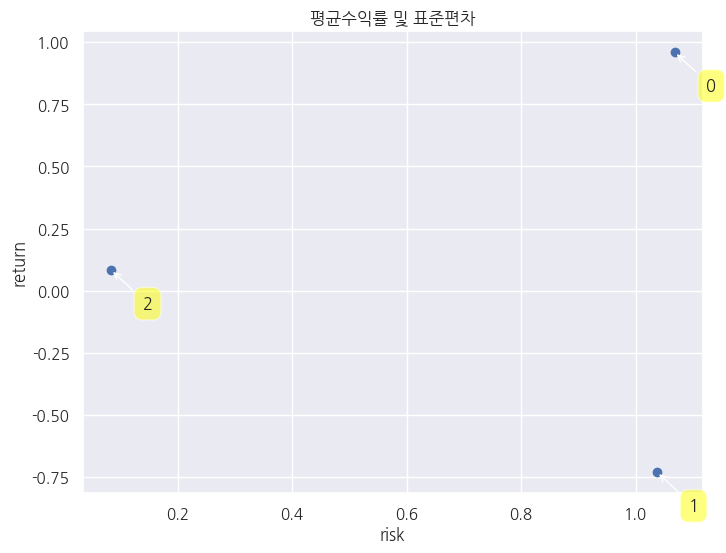

In [21]:
plt.figure(figsize=(8,6))
plt.scatter(cluster_total.std(), cluster_total.mean())
plt.xlabel('risk')
plt.ylabel('return')
plt.title('평균수익률 및 표준편차')
for label, x, y in zip(cluster_total.columns, cluster_total.std(), cluster_total.mean()):
    plt.annotate(label, xy=(x, y), xytext=(30, -30),
    textcoords = 'offset points',
    ha = 'right', va = 'bottom',
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))   

각 금융자산의 특징과 잘 맞게 군집이 잘 작성되었습니다.

## 상관관계 분석
- Kospi와 나머지 변수들의 상관관계를 확인

### 히트맵

In [22]:
df2 = df1.corr()

<Axes: >

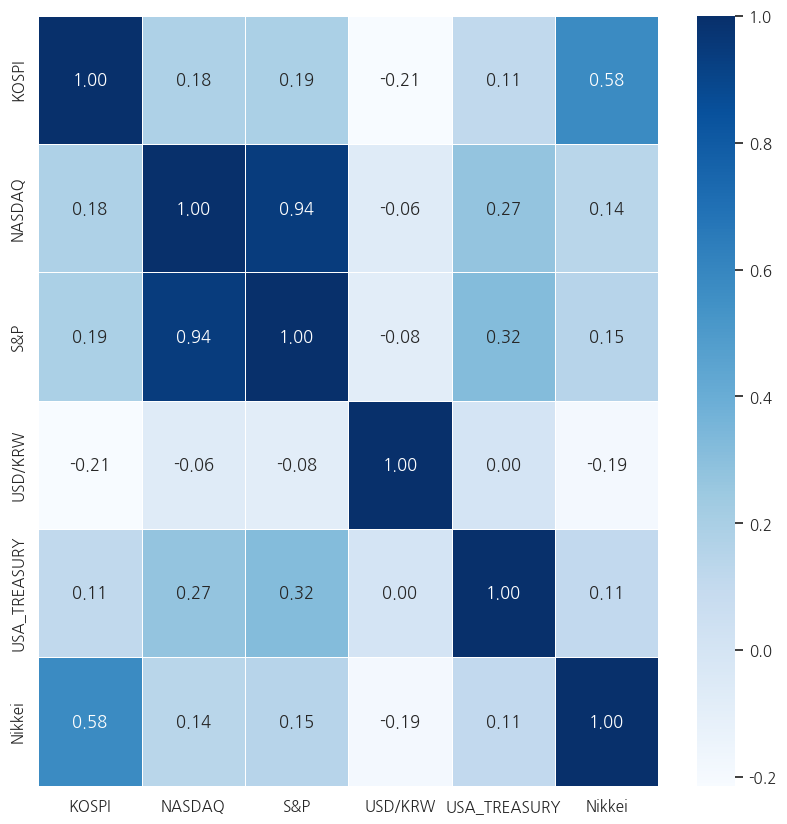

In [23]:
plt.figure(figsize=(10,10))
sns.heatmap(result_data.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues')

### 상관관계 계수 확인하기
- 확실히 Nasdaq과 S&P가 서로 미국시장이라서 상관관계가 높은것을 확인할 수 있고, kospi와의 상관관계는 1.Nikkei > 2. Nasdaq > 3. S&P > 4.usa_treasury > 5.Dollar 순의 상관관계를 보임

In [24]:
idx, vals = [], []
for ix, i in enumerate(result_data.columns.values):
    for j in result_data.columns.values[ix + 1:]:
        idx.append((i, j))
        vals.append(result_data.corr()[i][j])

ser = pd.Series(data=vals, index=idx)
ser_ord = ser.sort_values(ascending=False)
ser_ord

(NASDAQ, S&P)              0.938377
(KOSPI, Nikkei)            0.576193
(S&P, USA_TREASURY)        0.320329
(NASDAQ, USA_TREASURY)     0.273524
(KOSPI, S&P)               0.192238
(KOSPI, NASDAQ)            0.182993
(S&P, Nikkei)              0.150417
(NASDAQ, Nikkei)           0.140277
(KOSPI, USA_TREASURY)      0.113130
(USA_TREASURY, Nikkei)     0.105009
(USD/KRW, USA_TREASURY)    0.003050
(NASDAQ, USD/KRW)         -0.063350
(S&P, USD/KRW)            -0.083819
(USD/KRW, Nikkei)         -0.186367
(KOSPI, USD/KRW)          -0.213704
dtype: float64

### 산점도 그래프

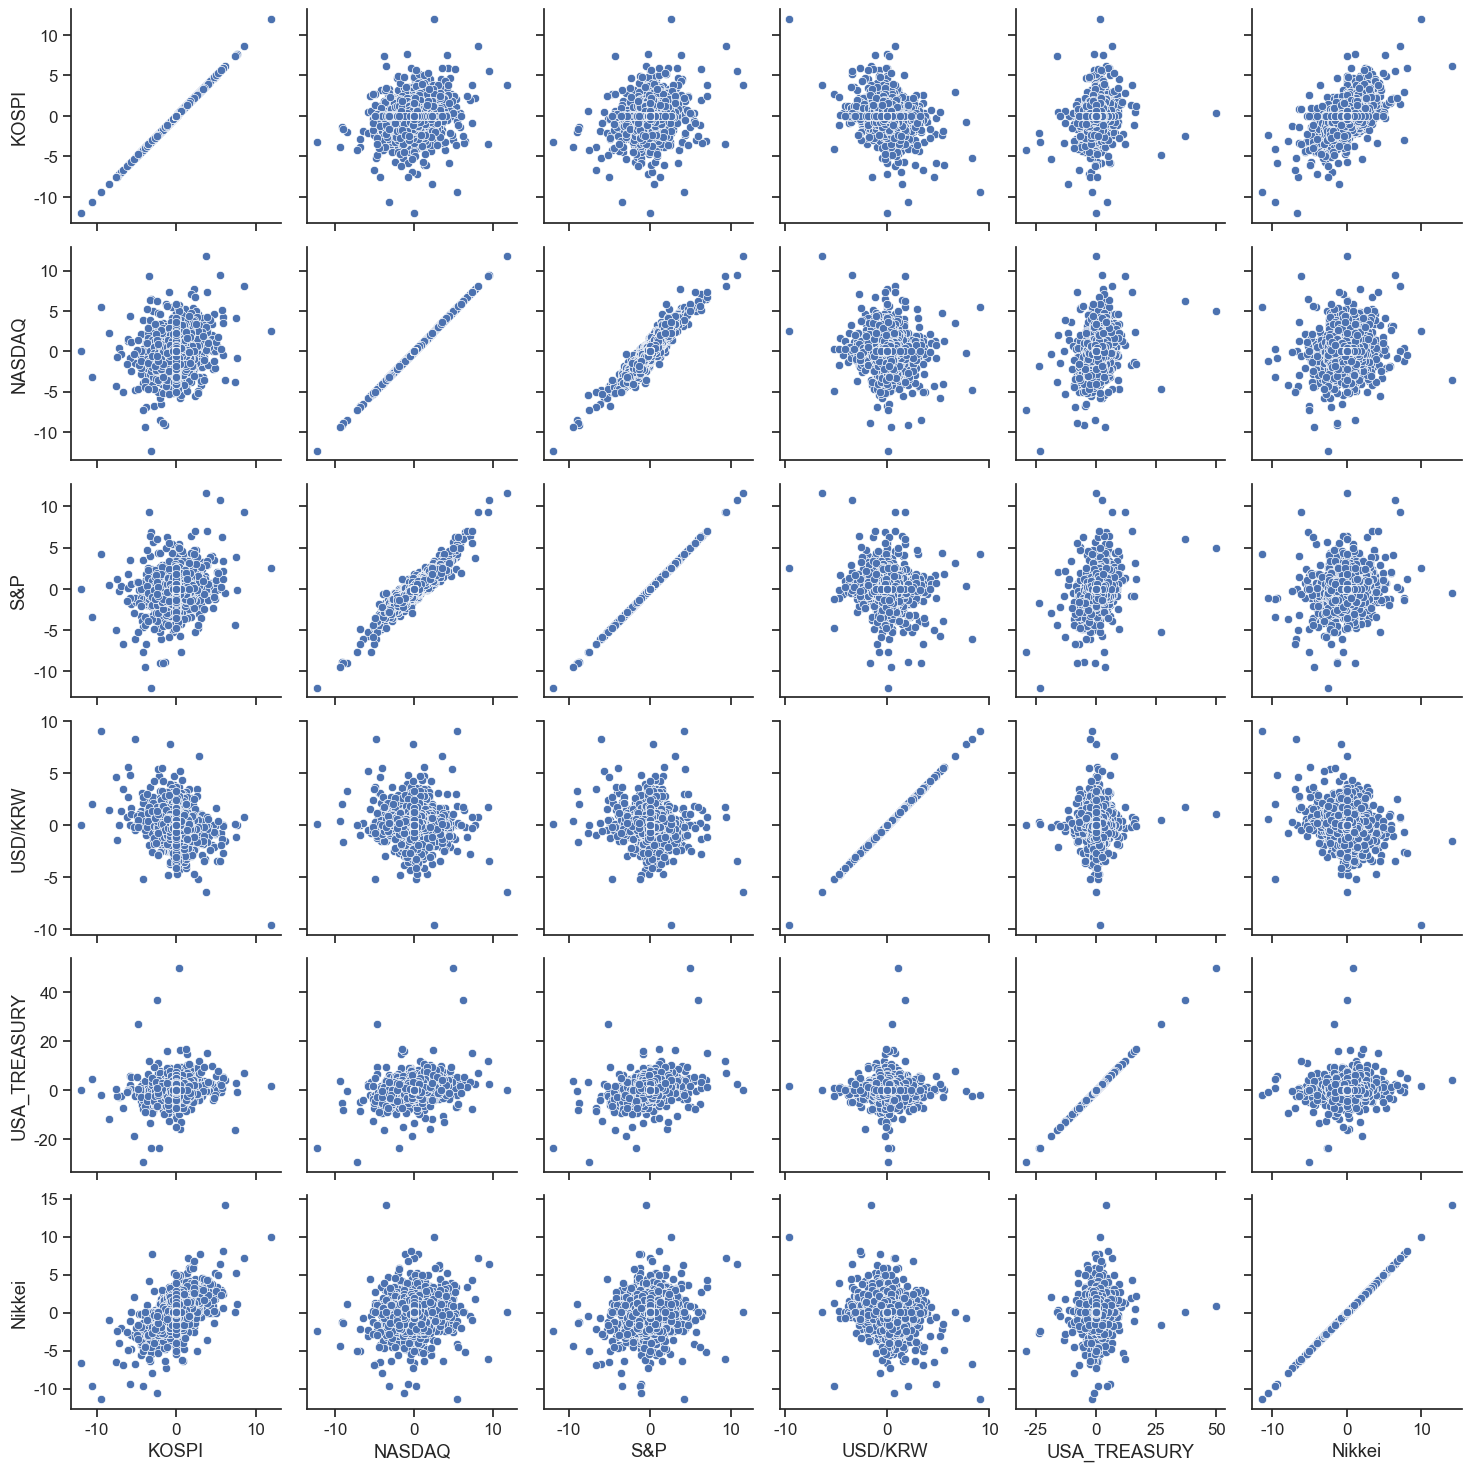

In [25]:
sns.set(font_scale=1.1) ## 폰트사이즈 조절
sns.set_style('ticks') ## 축 눈금 표시
data = result_data[["KOSPI", "NASDAQ","S&P","USD/KRW","USA_TREASURY","Nikkei"]]
sns.pairplot(data,diag_kind=None)
plt.show()

## 세계 각국 지수의 수익률 대비 risk 시각화

### 평균수익률 및 표준편차

c:\Users\sigma\Practices\practice-ml\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 54217 (\N{HANGUL SYLLABLE PYEONG}) missing from current font.
  func(*args, **kwargs)
c:\Users\sigma\Practices\practice-ml\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 44512 (\N{HANGUL SYLLABLE GYUN}) missing from current font.
  func(*args, **kwargs)
c:\Users\sigma\Practices\practice-ml\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 49688 (\N{HANGUL SYLLABLE SU}) missing from current font.
  func(*args, **kwargs)
c:\Users\sigma\Practices\practice-ml\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51061 (\N{HANGUL SYLLABLE IG}) missing from current font.
  func(*args, **kwargs)
c:\Users\sigma\Practices\practice-ml\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 47456 (\N{HANGUL SYLLABLE RYUL}) missing from current font.
  func(*args, **kwargs)
c:\Users\sigma\Practices\practice-ml\.venv\Lib\

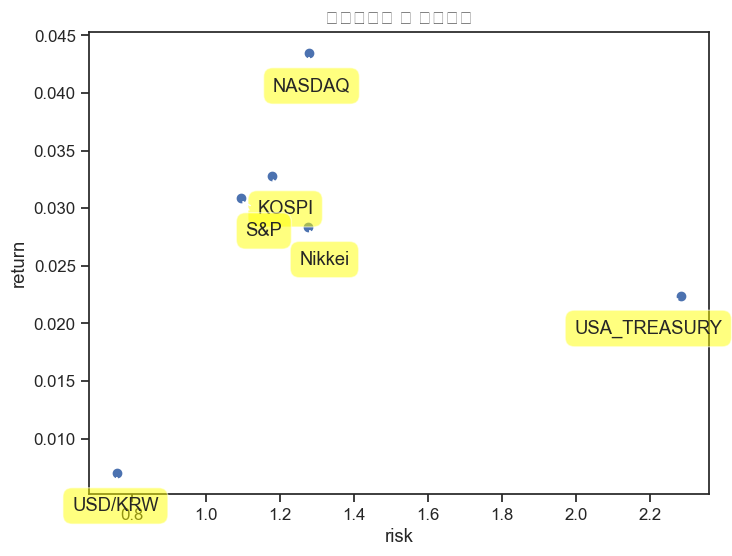

In [26]:
plt.figure(figsize=(8,6))
plt.scatter(result_data.std(), result_data.mean())
plt.xlabel('risk')
plt.ylabel('return')
plt.title('평균수익률 및 표준편차')
for label, x, y in zip(result_data.columns, result_data.std(), result_data.mean()):
    plt.annotate(label, xy=(x, y), xytext=(30, -30),
    textcoords = 'offset points',
    ha = 'right', va = 'bottom',
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))   

### 누적수익률 및 표준편차 

c:\Users\sigma\Practices\practice-ml\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 45572 (\N{HANGUL SYLLABLE NU}) missing from current font.
  func(*args, **kwargs)
c:\Users\sigma\Practices\practice-ml\.venv\Lib\site-packages\IPython\core\events.py:82: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  func(*args, **kwargs)
c:\Users\sigma\Practices\practice-ml\.venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 45572 (\N{HANGUL SYLLABLE NU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\sigma\Practices\practice-ml\.venv\Lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 51201 (\N{HANGUL SYLLABLE JEOG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


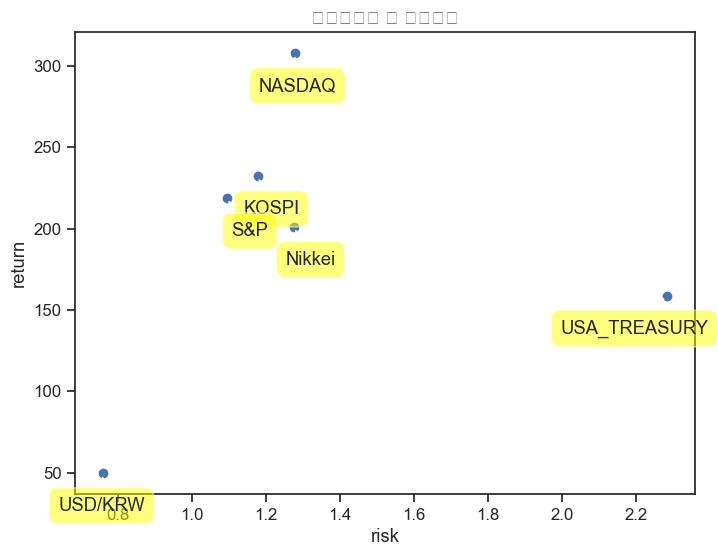

In [27]:
plt.figure(figsize=(8,6))
plt.scatter(result_data.std(), result_data.sum())
plt.xlabel('risk')
plt.ylabel('return')
plt.title('누적수익률 및 표준편차')
for label, x, y in zip(result_data.columns, result_data.std(), result_data.sum()):
    plt.annotate(label, xy=(x, y), xytext=(30, -30),
    textcoords = 'offset points',
    ha = 'right', va = 'bottom',
    bbox = dict(boxstyle = 'round,pad=0.5', fc = 'yellow', alpha = 0.5),
    arrowprops = dict(arrowstyle = '->', connectionstyle = 'arc3,rad=0'))   